Turnover Analysis

building full models

turnover can be expensive for business.
start with cleaning data

In [13]:
#all help is credit to HENRIQUE BORGES, Kaggle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [15]:
df = pd.read_csv(r"C:\Users\swank\Desktop\ML7-14\Employee Turnover Statistics\HR_comma_sep.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [16]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [17]:
df['Work_accident'] = df['Work_accident'] == 1
df['left'] = df['left'] == 1
df['promotion_last_5years'] = df['promotion_last_5years'] == 1
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident               bool
left                        bool
promotion_last_5years       bool
sales                     object
salary                    object
dtype: object

In [18]:
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'hadPromotion',
                        'Department' : 'department',
                        })
df.tail()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,left,hadPromotion,sales,salary
14994,0.40,0.57,2,151,3,False,True,False,support,low
14995,0.37,0.48,2,160,3,False,True,False,support,low
14996,0.37,0.53,2,143,3,False,True,False,support,low
14997,0.11,0.96,6,280,4,False,True,False,support,low
14998,0.37,0.52,2,158,3,False,True,False,support,low


# Data Analysis

## Current turnover rates

In the context of human resources, turnover is the act of replacing an employee with a new employee \[[1]\]. An organization’s turnover is measured as a percentage rate, which is referred to as its turnover rate, using this formula:

$$ T = \frac{left}{avg. employees} * 100 $$

[1]: https://en.wikipedia.org/wiki/Turnover_(employment)

So we calculate the turnover of our dataset with:

In [19]:
print('Turnover rate was: %.2f%%' % (len(df[df.left == 1]) / len(df) * 100))

Turnover rate was: 23.81%


If all those people left in the same year (there are no indications in the dataset for the date when people left), this is a **very** significant turnover rate. In fact, in 2017, LinkedIn analysis finds [an average worldwide turnover rate of 10.9% in their platform](https://business.linkedin.com/talent-solutions/blog/trends-and-research/2018/the-3-industries-with-the-highest-turnover-rates). Our dataset has turnover rates higher than the top industry - Technology (Software) - with an average of 13.2%.


## Statistical overview

In [20]:
df.shape

(14999, 10)

In [21]:
df.describe()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


In [22]:
df.corrwith(df.left)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

Turnover is not strongly correlated with any single variable. But it has a medium correlation with satisfaction which is enough for further analysis of this variable.

## Satisfaction

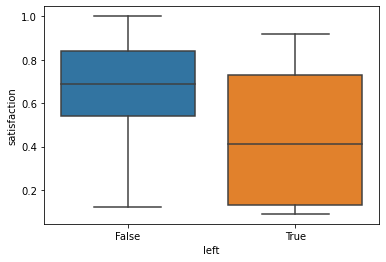

In [ ]:
sns.boxplot(x=df.left,y=df.satisfaction)

Using the boxplot above, we can see that people who left had a consistenly lower satisfaction rate. We will use this information as part of our [feature set](https://en.wikipedia.org/wiki/Feature_(machine_learning)) for the modeling step.

## Average Hours, evaluation and project count
So let's move to the other attributes. We will begin with the [Pearson Correlation](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient):

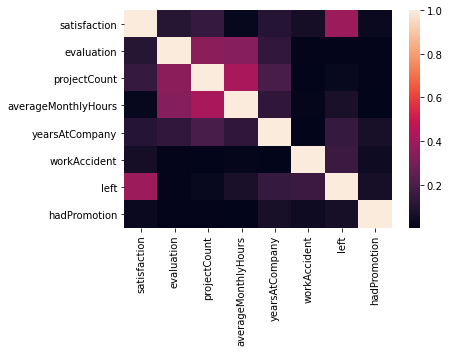

In [ ]:
sns.heatmap(abs(df.corr()))

Project count, average monthly hours and evaluation have medium correlations among themselves. So let's see them in a scatterplot

<Axes: xlabel='averageMonthlyHours', ylabel='evaluation'>

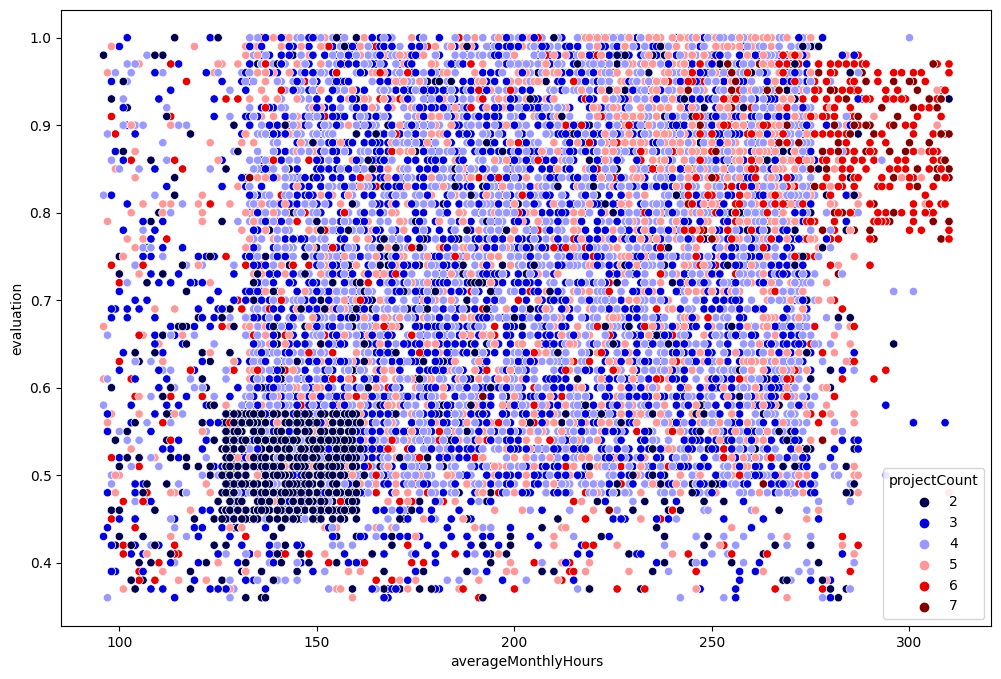

In [23]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(ax = ax, x=df.averageMonthlyHours,y=df.evaluation, hue=df.projectCount, palette="seismic")

The image above shows two strange clusters:
 1. A black one, with evaluation centered on 0.5, average monthly hours around 140 and project count around 2
 1. A red one, with high evaluation scores (centered on 0.9), average monthly hours above 250 and project count above 6
 
Now, lets see who have left the company from this evaluation/monthly hours plot. We will change the project count colors to use the turnover information

<Axes: xlabel='averageMonthlyHours', ylabel='evaluation'>

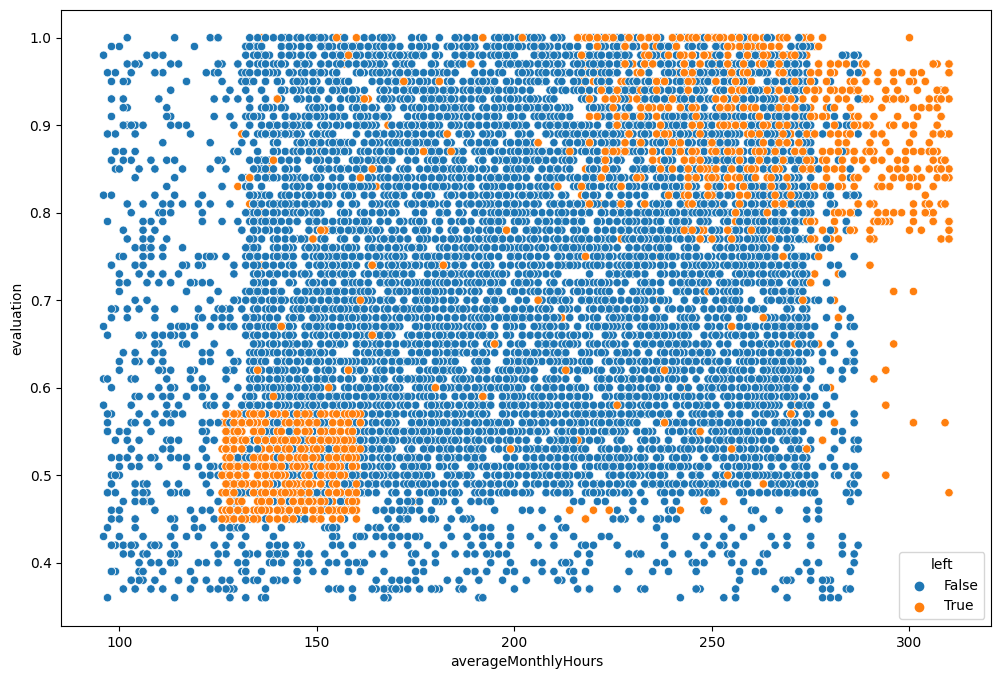

In [24]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(ax = ax, x=df.averageMonthlyHours,y=df.evaluation, hue=df.left)

Interesting enough, it looks like the same clusters. These three attributes together (evaluation, monthlyHours, projectCount) seems to be related to the turnover. We will include then in our feature set.

## Years at the company

We begin by exploring the years attribute and comparing it with other features. See the data below

In [25]:
df.yearsAtCompany.describe()

count    14999.000000
mean         3.498233
std          1.460136
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: yearsAtCompany, dtype: float64

<Axes: xlabel='left', ylabel='yearsAtCompany'>

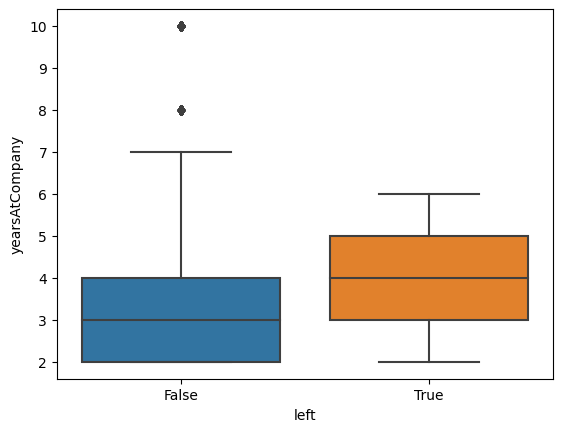

In [26]:
sns.boxplot(y=df.yearsAtCompany,x=df.left)

<Axes: xlabel='workAccident', ylabel='yearsAtCompany'>

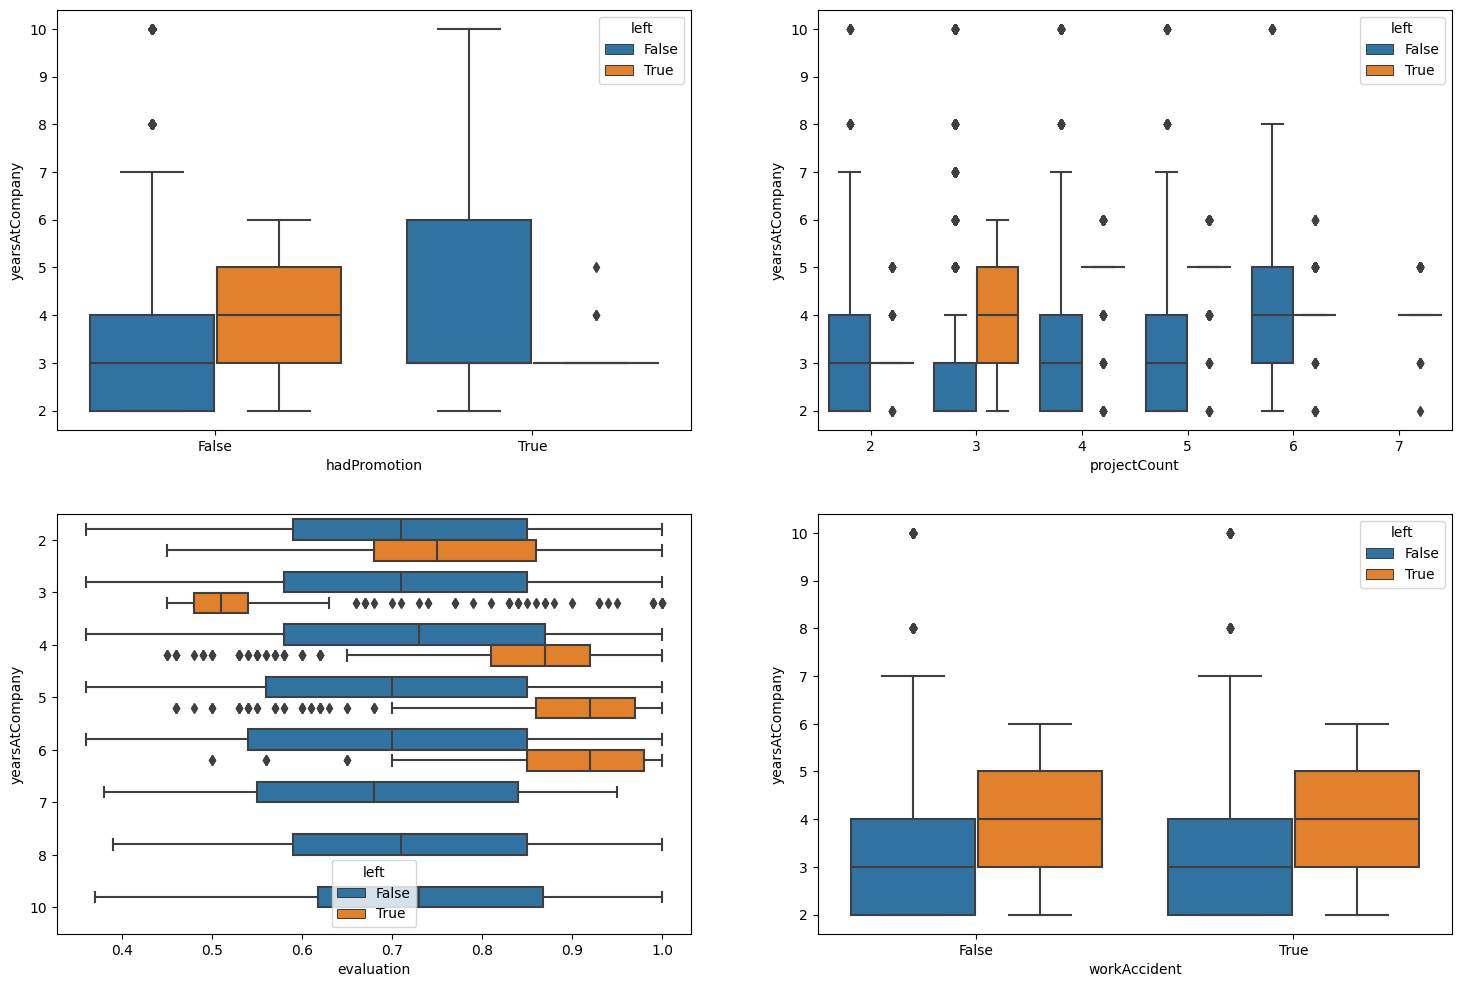

In [27]:
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(18,12))
sns.boxplot(ax = ax1[0],y=df.yearsAtCompany,x=df.hadPromotion,hue=df.left)
sns.boxplot(ax = ax1[1], y=df.yearsAtCompany, x=df.projectCount, hue=df.left)
sns.boxplot(ax = ax2[0], y=df.yearsAtCompany, x=df.evaluation, orient='h', hue=df.left)
sns.boxplot(ax = ax2[1], y=df.yearsAtCompany, x=df.workAccident, hue=df.left)

Years at the company seems to be a categorical value:
  1. 3 years or less
  1. Between 3 and 5
  1. More than 5
  
When the employee is between 3 and 5 years at the company, if he has or has not a promotion seems to be a decisive factor for the turnover. Moreover, in this specific range of 3-5 years, working on exactly 3 projects seems to be an unfortunate combination. The remaining attributes does not seem to correlate with years and turnover. We will create a new categorical attribute to reflect that discovery called *jobStability*.

In [28]:
df['jobStability'] = df.yearsAtCompany.apply(lambda y: 'lessThan3Years' if y <= 3 else 'averageYears' if y < 5  else 'moreThan5Years')
df[['jobStability','yearsAtCompany']]

,jobStability,yearsAtCompany
0,lessThan3Years,3
1,moreThan5Years,6
2,averageYears,4
3,moreThan5Years,5
4,lessThan3Years,3
...,...,...
14994,lessThan3Years,3
14995,lessThan3Years,3
14996,lessThan3Years,3
14997,averageYears,4


## Effects of promotions on turnover

Intuitively, a promotion, which is an essential part of the many rewards distributed by organizations, should affect the quitting behavior of individual employees.

In [29]:
df[['hadPromotion','left']].value_counts()

hadPromotion  left 
False         False    11128
              True      3552
True          False      300
              True        19
Name: count, dtype: int64

In [30]:
print('Only {:.2%} of the workforce had a promotion in the last 5 years. From those that had, only {:.2%} have left'.format(len(df[df.hadPromotion]) / len(df), len(df[df.hadPromotion & df.left])/ len(df[df.hadPromotion])))
print('Remember that our average turnover is {:.2%}'.format(len(df[df.left == 1]) / len(df)))

Only 2.13% of the workforce had a promotion in the last 5 years. From those that had, only 5.96% have left
Remember that our average turnover is 23.81%


Indeed, we can see that the number of people that left the company after receiving a promotion in the last 5 years is significantly lower. We will make this attribute part of our feature set.

## Work accident

In [31]:
df[['workAccident','left']].value_counts(normalize=True)

workAccident  left 
False         False    0.628575
              True     0.226815
True          False    0.133342
              True     0.011267
Name: proportion, dtype: float64

In [32]:
print('{:.2%} of the workforce had a work accident. From those that had, only {:.2%} have left'.format(len(df[df.workAccident]) / len(df), len(df[df.workAccident & df.left])/ len(df[df.workAccident])))

14.46% of the workforce had a work accident. From those that had, only 7.79% have left


With that, we end our exploratory data analysis and start to model our classifier.

# Describing turnover

We will use a [Decision Tree](https://scikit-learn.org/stable/modules/tree.html) to explain the factors that are making people leave the company and to let us give management recommendations. We will begin by preparing our data for the machine learning technique.

## Data preparation for modeling

In this section we will create our feature set (X) and expected outputs (Y). To do so, we will also normalize and covert labels to numbers.

In [33]:
# Import necessary machine learning libraries
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
features = df[['satisfaction','averageMonthlyHours','evaluation','projectCount','workAccident','hadPromotion']].copy()
features = pd.concat([features,pd.get_dummies(df['jobStability'])], axis=1)
features['workAccident'] = features['workAccident'].apply(lambda v: 1 if v else 0)
features['hadPromotion'] = features['hadPromotion'].apply(lambda v: 1 if v else 0)
X = features
X[0:5]

,satisfaction,averageMonthlyHours,evaluation,projectCount,workAccident,hadPromotion,averageYears,lessThan3Years,moreThan5Years
0,0.38,157,0.53,2,0,0,0,1,0
1,0.80,262,0.86,5,0,0,0,0,1
2,0.11,272,0.88,7,0,0,1,0,0
3,0.72,223,0.87,5,0,0,0,0,1
4,0.37,159,0.52,2,0,0,0,1,0


In [ ]:
y = df['left'].values
y[0:5]

array([ True,  True,  True,  True,  True])

Now we will separate the train, validation and test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
X_model_train, X_validation, y_model_train, y_validation = train_test_split(X_train, y_train, test_size=0.1, random_state=0)
print ('Model train set:', X_model_train.shape,  y_model_train.shape)
print ('Validation (hyperparameters test) set:', X_validation.shape,  y_validation.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Model train set: (12149, 9) (12149,)
Validation (hyperparameters test) set: (1350, 9) (1350,)
Test set: (1500, 9) (1500,)


Check the null model accuracy:

In [ ]:
df_y = pd.DataFrame(1 if left else 0 for left in y)
df_y.mean()

0    0.238083
dtype: float64

In [ ]:
y_null_predict = np.repeat(False,len(y_test))
print('Null model F1: ', f1_score(y_test, y_null_predict, average='weighted'))

Null model F1:  0.6572666919096302


And train our decision tree (it may take a while to run)

In [ ]:
def train_tree_with_validation():
    f1_scores = {}
    max_depth = range(1,20)
    impurity_decrease = [0.1,0.01,0.001,0.0001,0]
    for d in max_depth:
        for i in impurity_decrease:
            dTree = DecisionTreeClassifier(criterion="gini", max_depth = d, min_impurity_decrease=i)
            dTree.fit(X_model_train,y_model_train)
            f1_scores[(d,i)] = f1_score(y_validation, dTree.predict(X_validation))
    return max(f1_scores.keys(), key=(lambda key: f1_scores[key]))

In [34]:
best_hyper_values = train_tree_with_validation()
dTree = DecisionTreeClassifier(criterion="gini", max_depth = best_hyper_values[0], min_impurity_decrease=best_hyper_values[1])
dTree.fit(X_train,y_train)
print('Trained a decision tree with max_depth = {} and min_impurity_decrease = {}'.format(best_hyper_values[0],best_hyper_values[1]))
print('F1 score on test set: {:.3}'.format(f1_score(y_test, dTree.predict(X_test), average='weighted')))

NameError: name 'train_tree_with_validation' is not defined

Even though this decision tree had a high F1 score, it had a quite significant depth (9) to enable us to create meaningfull recomendations. If accuracy was the only thing that we were aiming for, there are better techniques to model the data, like Random Forest and XBoost. As such, we will reduce the max_depth to help us create management recomendations, even if it reduces the F1 for that.

In [35]:
dTree = DecisionTreeClassifier(criterion="gini", max_depth = 4, min_impurity_decrease=0.01)
dTree.fit(X_train,y_train)
print('F1 score with max_depth=4 on the test set: {:.3}'.format(f1_score(y_test, dTree.predict(X_test), average='weighted')))

NameError: name 'DecisionTreeClassifier' is not defined

Finally, we use the entire dataset and plot the final decision tree:

In [36]:
dTree = DecisionTreeClassifier(criterion="gini", max_depth = 4, min_impurity_decrease=0.01)
dTree.fit(X,y)

fig, ax = plt.subplots(figsize=(40,30))
tree.plot_tree(dTree, feature_names=features.columns,label='none',filled=True,proportion=True,impurity=False,rounded=True, max_depth=4)
plt.show()

NameError: name 'DecisionTreeClassifier' is not defined

## Recomendations

The decision tree above allow us to give management recomendations to avoid turnover:
* The single most important attribute is employee satisfaction. Management should focus on keeping all employees with **satisfaction above 0.465**
* Failing that, management should pay close attention on:
     * the employess with low satisfaction that are working only on 2 projects and had an evaluation score below 0.575. They will probabily leave or be fired
     * the employees with extremely low satisfaction (0.115 or less) working on 3 or more projects. They will surely leave. 
* Even for the workers that have a high satisfaction, they should pay attention on old employees (5 or more years at the company) with evaluation above 0.815 (top performers) that are working, in average, more than 216 hours per month.

In [37]:
reason1 = df[(df.satisfaction < 0.465)]
reason2 = df[(df.satisfaction < 0.465) & (df.projectCount == 2) & (df.evaluation <= 0.575) ]
reason3 = df[(df.satisfaction <= 0.115) &(df.projectCount >=3)]
reason4 = df[(df.satisfaction > 0.465) & (df.yearsAtCompany >= 5) & (df.evaluation > 0.815) & (df.averageMonthlyHours > 216)]

print('1. In general, keep satisfaction high. - Satisfaction < 0.465: {:.2%} left'.format(len(reason1[reason1.left])/ len(reason1)))
print('2. Unhappy, low performers working on only 2 projects leave or are fired - Satisfaction < 0.465, projectCount == 2, evaluation <= 0.575: {:.2%} left'.format(len(reason2[reason2.left])/ len(reason2)))
print('3. Very unhappy, working on 3 or more projects leave - Satisfaction <= 0.115, projectCount >= 3: {:.2%} left'.format(len(reason3[reason3.left])/ len(reason3)))
print('4. Long time overworked top-performers leave - Satisfaction > 0.465, yearsAtCompany >= 5, evaluation > 0.815, workingHours > 216: {:.2%} left'.format(len(reason4[reason4.left])/ len(reason4)))

1. In general, keep satisfaction high. - Satisfaction < 0.465: 60.51% left
2. Unhappy, low performers working on only 2 projects leave or are fired - Satisfaction < 0.465, projectCount == 2, evaluation <= 0.575: 94.48% left
3. Very unhappy, working on 3 or more projects leave - Satisfaction <= 0.115, projectCount >= 3: 100.00% left
4. Long time overworked top-performers leave - Satisfaction > 0.465, yearsAtCompany >= 5, evaluation > 0.815, workingHours > 216: 86.86% left
